In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold, cross_val_score


df = pd.read_csv("advertising.csv")

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


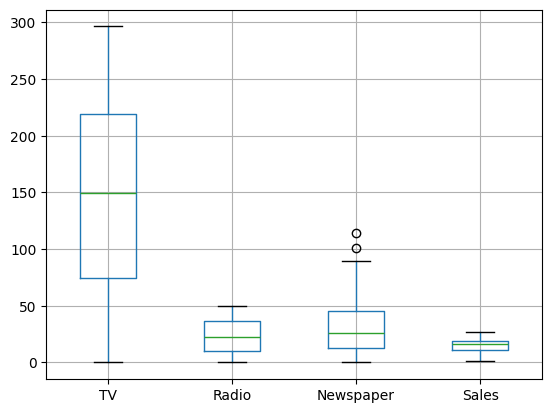

In [7]:
column = df[["TV","Radio","Newspaper","Sales"]]

column.boxplot()

plt.show()

In [8]:
df = df[df["Newspaper"]<100]

df.shape

(198, 4)

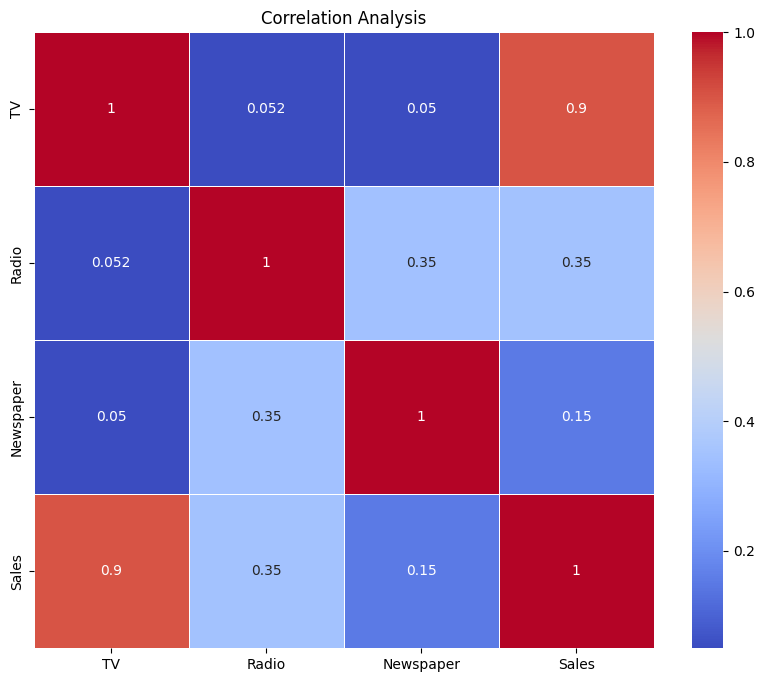

In [9]:
column = ["TV","Radio","Newspaper","Sales"]
corr = df[column].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

##### The column TV is the more features correlate with the sales 

### fit a linear regression model

In [10]:
X = df["TV"].values
y = df["Sales"].values

X = X.reshape(-1,1)

In [11]:
reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg.fit(X_train,y_train)

predict = reg.predict(X)

### Cross-Validation

In [12]:
kf = KFold(n_splits=10, shuffle=True, random_state=5)

cv_scores = cross_val_score(reg, X, y, cv=kf)

cv_scores

array([0.76385877, 0.70030693, 0.87674086, 0.74109223, 0.65705199,
       0.8673466 , 0.80346852, 0.83478022, 0.7713322 , 0.72572751])

In [14]:
import numpy as np

print(np.mean(cv_scores))

print(np.std(cv_scores))

print(np.quantile(cv_scores, [0.025, 0.975]))

0.7741705822033277
0.06816321011709774
[0.66678435 0.87462715]
